# Логистическая регрессия

###### Введение
Логистическая регрессия — один из видов линейных классификаторов. Одной из ее особенностей является возможность оценивания вероятностей классов, тогда как большинство линейных классификаторов могут выдавать только номера классов. 

Логистическая регрессия использует достаточно сложный функционал качества, который не допускает записи решения в явном виде (в отличие от, например, линейной регрессии). Тем не менее, логистическую регрессию можно настраивать с помощью градиентного спуска.

Мы будем работать с выборкой, содержащей два признака. Будем считать, что ответы лежат в множестве {-1, 1}. Для настройки логистической регрессии мы будем решать следующую задачу:
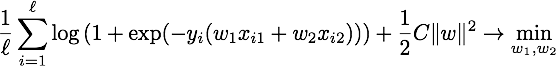
Здесь xi1 и xi2 — значение первого и второго признаков соответственно на объекте xi. В этом задании мы будем рассматривать алгоритмы без свободного члена, чтобы упростить работу.

Градиентный шаг для весов будет заключаться в одновременном обновлении весов w1 и w2 по следующим формулам (проверьте сами, что здесь действительно выписана производная нашего функционала):
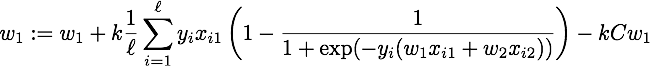

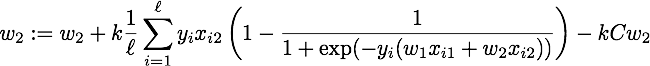
Здесь k — размер шага. 

Линейные методы могут переобучаться и давать плохое качество из-за различных проблем в данных: мультиколлинеарности, зашумленности и т.д. Чтобы избежать этого, следует использовать регуляризацию — она позволяет понизить сложность модели и не допустить переобучения. Сила регуляризации определяется коэффициентом C в формулах, указанных выше.

В этом задании мы предлагаем вам самостоятельно реализовать градиентный спуск. 

В качестве метрики качества будем использовать AUC-ROC (Area Under ROC-Curve). Она предназначена для алгоритмов бинарной классификации, выдающих оценку принадлежности объекта к одному из классов. По сути, значение этой метрики является агрегацией показателей качества всех алгоритмов, которые можно получить, выбирая какой-либо порог для оценки принадлежности.

В Scikit-Learn метрика AUC реализована функцией sklearn.metrics.roc_auc_score. В качестве первого аргумента ей передается вектор истинных ответов, в качестве второго — вектор с оценками принадлежности объектов к первому классу.

In [7]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data-logistic.csv', index_col=False, header=None)

In [6]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

Реализуйте градиентный спуск для обычной и L2-регуляризованной (с коэффициентом регуляризации 10) логистической регрессии. Используйте длину шага k=0.1. В качестве начального приближения используйте вектор (0, 0).

In [81]:
def grad_dec(w1, w2, lr, C, epsilon, max_iter):
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    l = len(y)
    
    for i in range(max_iter):       
        w1_new = w1 + lr * 1/l * sum((y * x1 * (1 - (1 / (1 + np.exp(-y * (w1 * x1 + w2 * x2))))))) - lr * C * w1
        w2_new = w2 + lr * 1/l * sum((y * x2 * (1 - (1 / (1 + np.exp(-y * (w1 * x1 + w2 * x2))))))) - lr * C * w2
            
        if np.sqrt(np.square(w1_new-w1) + np.square(w2_new-w2)) <= epsilon:
            print(i)
            break
        
        w1, w2 = w1_new, w2_new
        #loss = 1/l * sum(np.log(1 + np.exp(-y * (w1 * x1 + w2 * x2)))) + 1/2 * C * pow(sum(w1 + w2),2)
        
    predictions = []       
    predictions.append(1.0 / 1 + np.exp(w1*x1 + w2*x2))
    return np.array(predictions).reshape(-1)

In [82]:
c0 = grad_dec(w1=0, w2=0, lr=0.1, C=0, epsilon=0.00001, max_iter=10000)
c10 = grad_dec(w1=0, w2=0, lr=0.1, C=10, epsilon=0.00001, max_iter=10000)

243
7


In [44]:
from sklearn.metrics import roc_auc_score

In [83]:
print(roc_auc_score(y,c0))
print(roc_auc_score(y,c10))

0.9268571428571428
0.9362857142857142
